# Titanic Survival Prediction

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import os
import joblib

# set display options for better clarity
pd.set_option('display.max_columns', None)

## Load the Dataset

In [14]:
data = pd.read_csv(r'C:\Users\user\Desktop\ENCRYPTIX Data Science Internship\data\Titanic-Dataset.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## Exploratory Data Analysis (EDA)

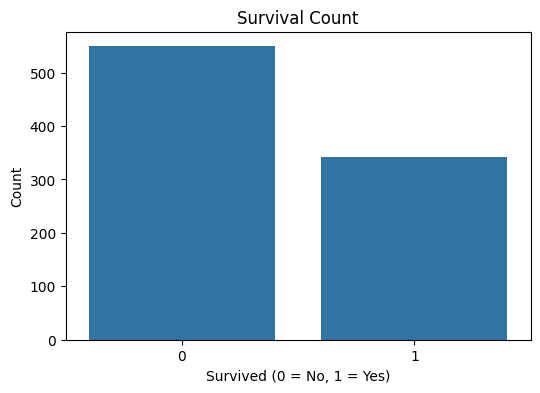

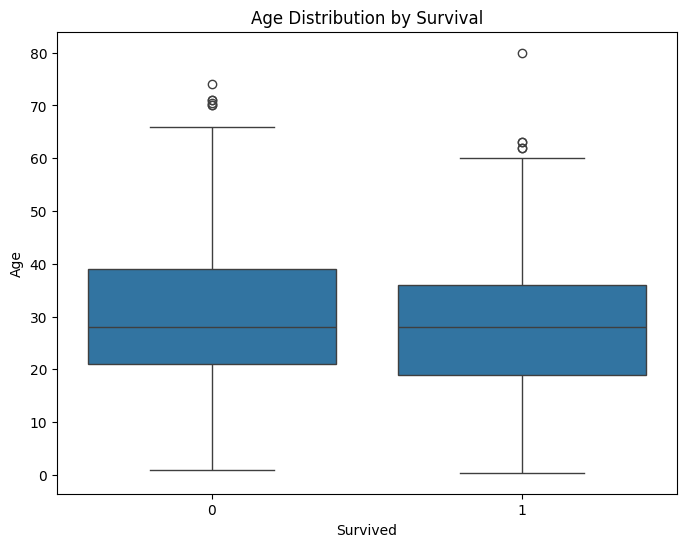

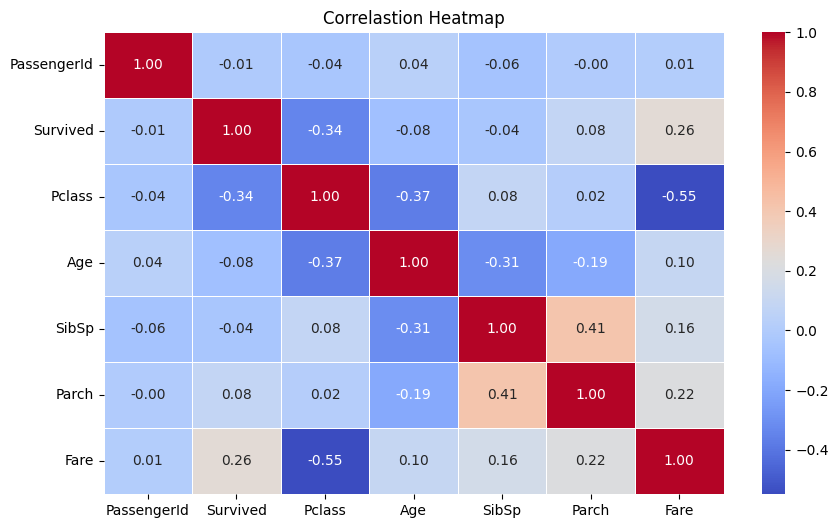

In [16]:
# visualize the survival rate
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Survived')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# explore relationship between numerical features and survival
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.show()

# select only numerical data for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64', 'bool'])
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlastion Heatmap")
plt.show()

## Handle Missing Values

In [17]:
null_counts=data.isnull().sum()

for column, count in null_counts.items():
    if count > 0:
        print(f"Column '{column}' has {count} null values.")

Column 'Age' has 177 null values.
Column 'Cabin' has 687 null values.
Column 'Embarked' has 2 null values.


## Data Preprocessing

In [18]:
# fill missing Age values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

# fill missing Embarked values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# drop the cabin column due too manu missing values (also we dont use it for now)
data.drop('Cabin', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20836\3083279959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_20836\3083279959.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [20]:
from sklearn.preprocessing import LabelEncoder

# encode 'Sex'
# male = 1, female = 0
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [21]:
# one hot encode for 'Embarked'
embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, embarked_dummies], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,False,False,True


## Feature Selection

In [22]:
data.drop(['Name', 'Ticket', 'PassengerId', 'Embarked'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,True
888,0,3,0,28.0,1,2,23.4500,False,False,True
889,1,1,1,26.0,0,0,30.0000,True,False,False


## Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [24]:
print(X.dtypes)

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [25]:
# convert boolean columns to integers
X = X.astype({'Embarked_C': 'int64', 'Embarked_Q': 'int64', 'Embarked_S': 'int64'})

In [26]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print("This is the results of the X_train data:")
print(X_train.head())
print("This is the results of the y_train data:")
print(y_train.tail())

This is the results of the X_train data:
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
331       1    1  45.5      0      0  28.5000           0           0   
733       2    1  23.0      0      0  13.0000           0           0   
382       3    1  32.0      0      0   7.9250           0           0   
704       3    1  26.0      1      0   7.8542           0           0   
813       3    0   6.0      4      2  31.2750           0           0   

     Embarked_S  
331           1  
733           1  
382           1  
704           1  
813           1  
This is the results of the y_train data:
106    1
270    0
860    0
435    1
102    0
Name: Survived, dtype: int64


In [28]:
print("This is the results of the X_test data:")
print(X_test.head())
print("This is the results of the y_test data:")
print(y_test.tail())

This is the results of the X_test data:
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
709       3    1  28.0      1      1  15.2458           1           0   
439       2    1  31.0      0      0  10.5000           0           0   
840       3    1  20.0      0      0   7.9250           0           0   
720       2    0   6.0      0      1  33.0000           0           0   
39        3    0  14.0      1      0  11.2417           1           0   

     Embarked_S  
709           0  
439           1  
840           1  
720           1  
39            0  
This is the results of the y_test data:
433    0
773    0
25     1
84     1
10     1
Name: Survived, dtype: int64


## Build and Train the Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# train the model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\user\Desktop\ENCRYPTIX Data Science Internship\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# make predictions and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## Predictions on Test Set

In [32]:
# add predictions to the test set
results = X_test.copy()
results['Predicted_Survived'] = y_pred
results['Actual_Survived'] = y_test.values

results.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Predicted_Survived,Actual_Survived
709,3,1,28.0,1,1,15.2458,1,0,0,0,1
439,2,1,31.0,0,0,10.5000,0,0,1,0,0
840,3,1,20.0,0,0,7.9250,0,0,1,0,0
720,2,0,6.0,0,1,33.0000,0,0,1,1,1
39,3,0,14.0,1,0,11.2417,1,0,0,1,1


## Save Results

In [35]:
# save to csv
results.to_csv(r"C:\Users\user\Desktop\ENCRYPTIX Data Science Internship\results\titanic_predictions.csv", index=False)
print("Results saved to 'titanic_predictions.csv'")

Results saved to 'titanic_predictions.csv'


## Save Model


In [38]:
# we could use save path with import os (just another way)
save_dir = r"C:\Users\user\Desktop\ENCRYPTIX Data Science Internship\models"
os.makedirs(save_dir, exist_ok=True) # create the directory if it doesnt exist

file_path = os.path.join(save_dir, "titanic_survival_logistic_regression.pkl")


joblib.dump(model, file_path)
print("Model saved as 'titanic_survival_logistic_regression.pkl'")

#loaded_model = joblib.load(file_path)

Model saved as 'titanic_survival_logistic_regression.pkl'
